In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score



In [2]:
data_GradientBoost = pd.read_csv('/home/cid34senhas/Desktop/DAATP/Entrega/2_data_GradientBoost.csv')

In [3]:
def plot_confusion_matrix_with_labels(confusion_matrix, label_mapping):
    # Criar um mapeamento inverso
    reverse_label_mapping = {v: k for k, v in label_mapping.items()}
    
    # Aplicar o mapeamento inverso na matriz de confusão
    cm_with_labels = np.zeros_like(confusion_matrix, dtype=object)
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            cm_with_labels[i, j] = f"{reverse_label_mapping[i]} (Pred: {reverse_label_mapping[j]})"

    # Criar um DataFrame para facilitar a visualização
    df_cm = pd.DataFrame(confusion_matrix, index=reverse_label_mapping.values(), columns=reverse_label_mapping.values())
    
    # Plotar a matriz de confusão
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix with Labels')
    plt.show()
label_mapping = {
    'CN-CN': 0,
    'AD-AD': 1,
    'MCI-AD': 2,
    'MCI-MCI': 3,
    'CN-MCI' : 4
}

In [4]:
X = data_GradientBoost.drop(['Transition'], axis= 1)
y = data_GradientBoost['Transition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=34, stratify=y)


              precision    recall  f1-score   support

           0       0.58      0.58      0.58        24
           1       0.80      0.53      0.64        15
           2       0.42      0.47      0.44        17
           3       0.33      0.44      0.38        18
           4       0.00      0.00      0.00         3

    accuracy                           0.49        77
   macro avg       0.43      0.41      0.41        77
weighted avg       0.51      0.49      0.49        77



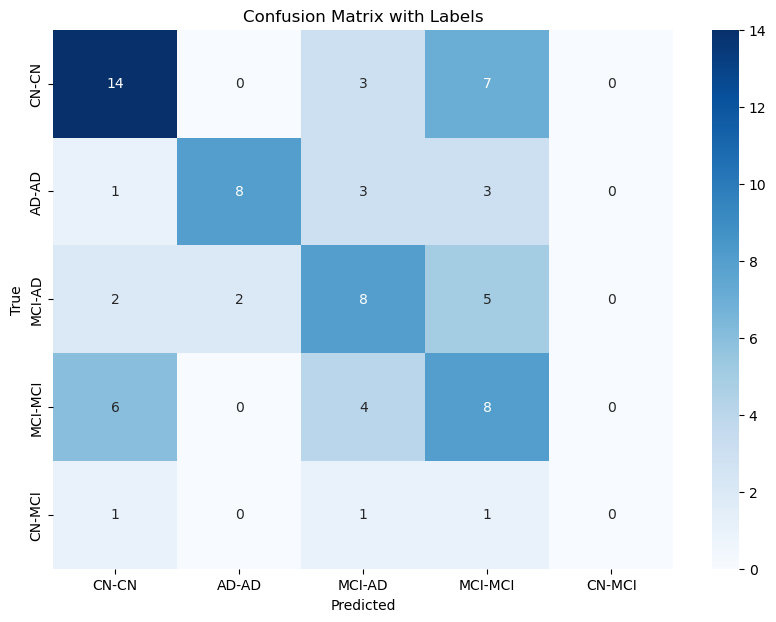

In [5]:
gb_model_score = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, random_state=34)


gb_model_score.fit(X_train, y_train)
gb_pred = gb_model_score.predict(X_test)
print(classification_report(y_test,gb_pred,zero_division=0))
cm = confusion_matrix(y_test,gb_pred)
plot_confusion_matrix_with_labels(cm,label_mapping)



In [6]:
gradientBoost_score = cross_val_score(gb_model_score, X, y, cv=5,scoring='f1_macro')

print(f"Cross Validation Score: {gradientBoost_score}")
print(f"Cross Validation Score Média: {gradientBoost_score.mean()}")
print(f"Cross Validation Score STD: {gradientBoost_score.std()}")

Cross Validation Score: [0.32685584 0.26190731 0.26973461 0.36777102 0.33105413]
Cross Validation Score Média: 0.31146458219019807
Cross Validation Score STD: 0.03997091392638558


## Aplicar Normalização 

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_norm = data_GradientBoost.drop(['Transition'], axis= 1)
y_norm = data_GradientBoost['Transition']
X_norm = scaler.fit_transform(X_train_norm)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.25, random_state=34, stratify=y)



              precision    recall  f1-score   support

           0       0.60      0.62      0.61        24
           1       0.60      0.40      0.48        15
           2       0.35      0.41      0.38        17
           3       0.32      0.39      0.35        18
           4       0.00      0.00      0.00         3

    accuracy                           0.45        77
   macro avg       0.37      0.37      0.36        77
weighted avg       0.46      0.45      0.45        77



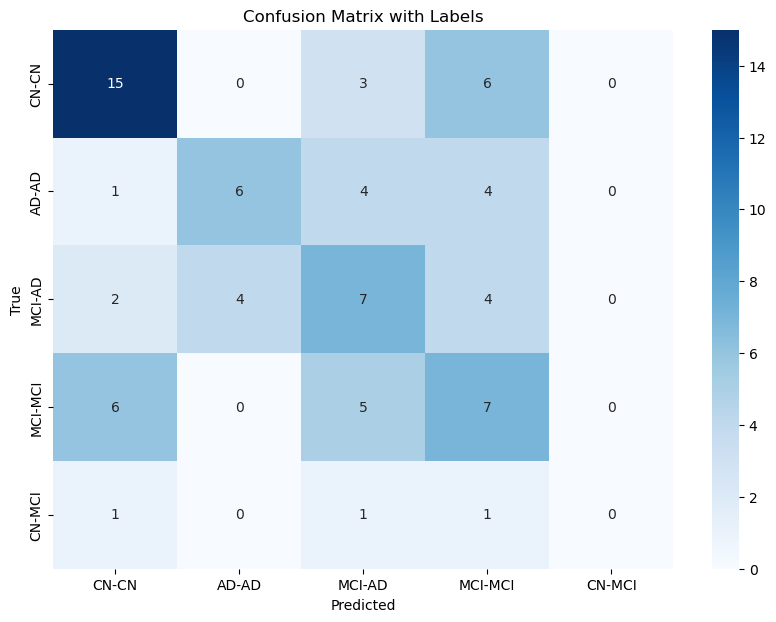

In [8]:
gb_model_norm = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, random_state=34)


gb_model_norm.fit(X_train, y_train)
gb_pred = gb_model_norm.predict(X_test)
print(classification_report(y_test,gb_pred,zero_division=0))
cm = confusion_matrix(y_test,gb_pred)
plot_confusion_matrix_with_labels(cm,label_mapping)



In [9]:
gb_norm = cross_val_score(gb_model_norm, X_norm, y_norm, cv=5,scoring='f1_macro')

print(f"Cross Validation Score: {gb_norm}")
print(f"Cross Validation Score Média: {gb_norm.mean()}")
print(f"Cross Validation Score STD: {gb_norm.std()}")

Cross Validation Score: [0.32486822 0.26190731 0.31124286 0.35127273 0.36310541]
Cross Validation Score Média: 0.32247930584541534
Cross Validation Score STD: 0.03544142525636519


Como houve uma ligueira melhoria do modelo com os dados normalizados, iremos usar assim os dados daqui para a frente 

## Smote

Y Train Values:
Transition
0    72
3    53
2    51
1    45
4     7
Name: count, dtype: int64
Y Train Values:
Transition
2    72
1    72
3    72
0    72
4    72
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.57      0.54      0.55        24
           1       0.58      0.47      0.52        15
           2       0.25      0.24      0.24        17
           3       0.20      0.28      0.23        18
           4       0.00      0.00      0.00         3

    accuracy                           0.38        77
   macro avg       0.32      0.30      0.31        77
weighted avg       0.39      0.38      0.38        77



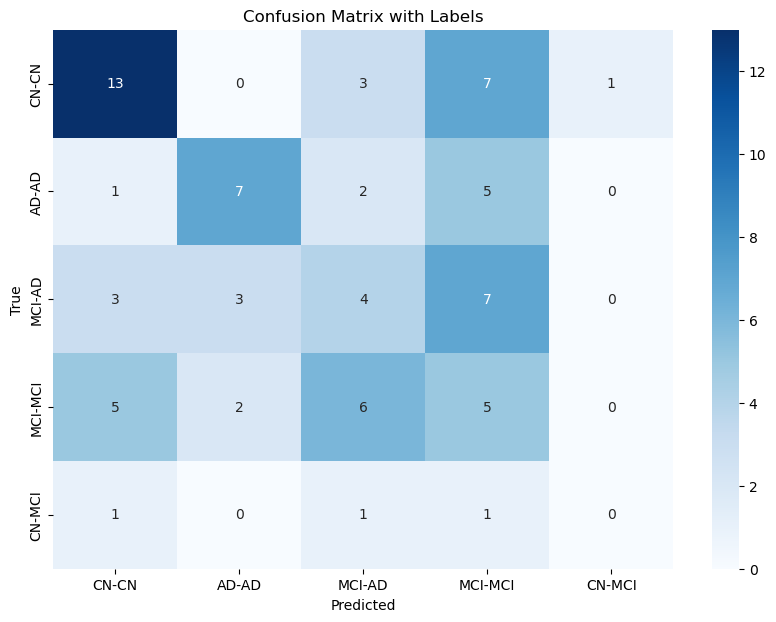

In [10]:
data_Gradient_norm = pd.read_csv('/home/cid34senhas/Desktop/DAATP/Entrega/7_data_Gradient_boosting_normalized.csv')


X_norm = data_Gradient_norm.drop(['Transition'], axis= 1)
y_norm = data_Gradient_norm['Transition']


X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.25, random_state=34, stratify=y_norm)

gb_model_norm = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, random_state=34)

print("Y Train Values:")
print(y_train.value_counts())


smote = SMOTE(sampling_strategy="auto", random_state=34)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Y Train Values:")
print(y_train_smote.value_counts())


gb_model_norm.fit(X_train_smote, y_train_smote)
gb_pred = gb_model_norm.predict(X_test)
print(classification_report(y_test, gb_pred,zero_division=0))
cm = confusion_matrix(y_test, gb_pred)
plot_confusion_matrix_with_labels(cm,label_mapping)



In [11]:
gb_score_smote = cross_val_score(gb_model_norm, X_norm, y_norm, cv=5,scoring='f1_macro')

print(f"Cross Validation Score: {gb_score_smote}")
print(f"Cross Validation Score Média: {gb_score_smote.mean()}")
print(f"Cross Validation Score STD: {gb_score_smote.std()}")

Cross Validation Score: [0.32486822 0.26190731 0.31124286 0.35127273 0.36310541]
Cross Validation Score Média: 0.32247930584541534
Cross Validation Score STD: 0.03544142525636519



Número de features por intervalo de importância:
Entre 0.012 e inf: 15
Entre 0.010 e 0.012: 5
Entre 0.008 e 0.010: 7
Entre 0.006 e 0.008: 8
Entre 0.004 e 0.006: 22
Entre 0.002 e 0.004: 48
Entre 0.000 e 0.002: 304


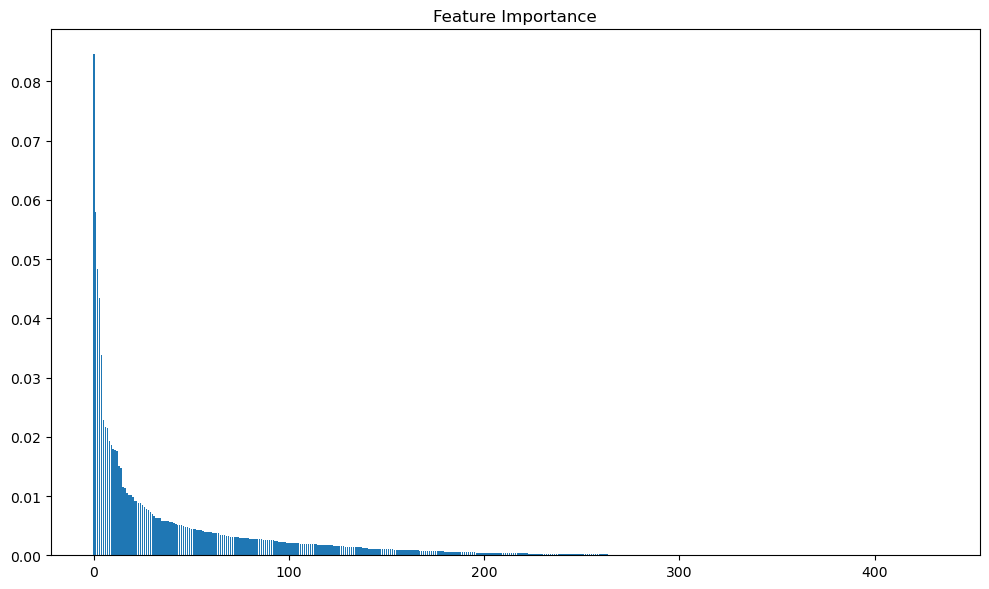

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def feature_importance(model, X_train):

    # Obter as importâncias das features
    importances = model.feature_importances_

    # Exibir os intervalos de importância
    thresholds = [(0.012, float('inf')), (0.010, 0.012), (0.008, 0.010), 
                  (0.006, 0.008), (0.004, 0.006), (0.002, 0.004), (0, 0.002)]
    
    print("\nNúmero de features por intervalo de importância:")
    for low, high in thresholds:
        count = np.sum((importances > low) & (importances <= high))
        print(f"Entre {low:.3f} e {high:.3f}: {count}")

    # Ordenar as importâncias em ordem decrescente
    indices = np.argsort(importances)[::-1]

    # Criar o gráfico
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance")
    
    # Adicionar barras
    plt.bar(range(X_train.shape[1]), importances[indices])

    # Exibir o gráfico
    plt.tight_layout()
    plt.show()



feature_importance(gb_model_norm,X_train)


--- Avaliando com threshold: 0.012 ---
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        24
           1       0.50      0.47      0.48        15
           2       0.41      0.41      0.41        17
           3       0.29      0.44      0.35        18
           4       0.00      0.00      0.00         3

    accuracy                           0.40        77
   macro avg       0.34      0.34      0.33        77
weighted avg       0.41      0.40      0.40        77



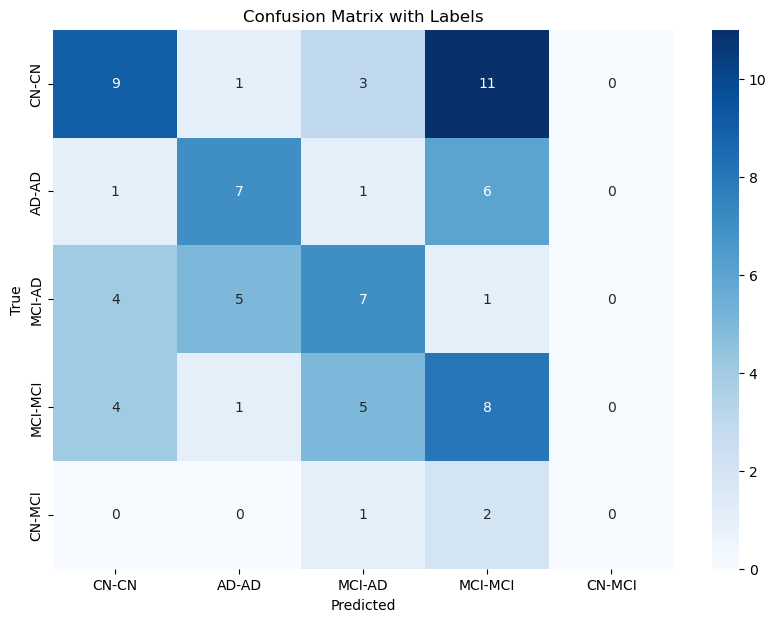

Cross Validation Score: [0.31271512 0.30699543 0.34946742 0.37740816 0.42182151]
Cross Validation Score Média: 0.3536815279550211
Cross Validation Score STD: 0.04261832248425133

--- Avaliando com threshold: 0.01 ---
              precision    recall  f1-score   support

           0       0.57      0.50      0.53        24
           1       0.54      0.47      0.50        15
           2       0.27      0.24      0.25        17
           3       0.36      0.56      0.43        18
           4       0.00      0.00      0.00         3

    accuracy                           0.43        77
   macro avg       0.35      0.35      0.34        77
weighted avg       0.43      0.43      0.42        77



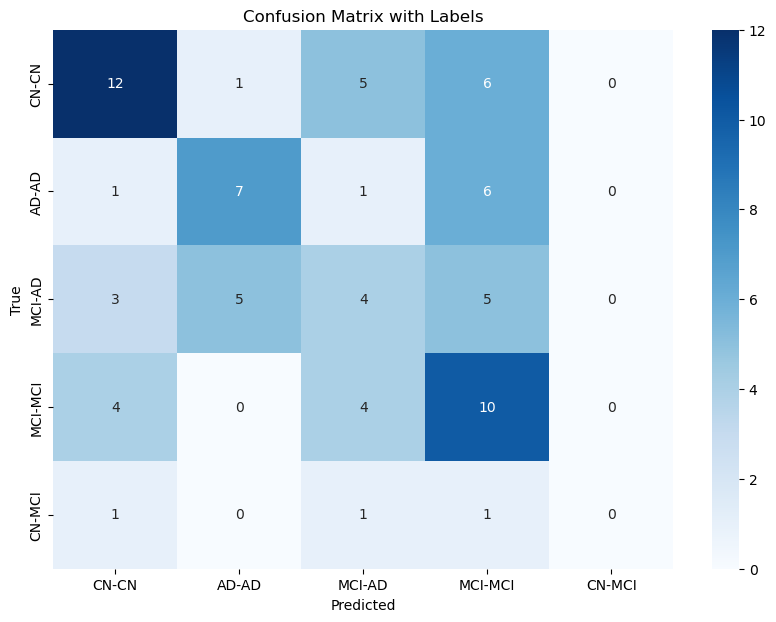

Cross Validation Score: [0.31271512 0.30699543 0.34946742 0.37740816 0.42182151]
Cross Validation Score Média: 0.3536815279550211
Cross Validation Score STD: 0.04261832248425133

--- Avaliando com threshold: 0.008 ---
              precision    recall  f1-score   support

           0       0.52      0.50      0.51        24
           1       0.40      0.40      0.40        15
           2       0.36      0.29      0.32        17
           3       0.38      0.50      0.43        18
           4       0.00      0.00      0.00         3

    accuracy                           0.42        77
   macro avg       0.33      0.34      0.33        77
weighted avg       0.41      0.42      0.41        77



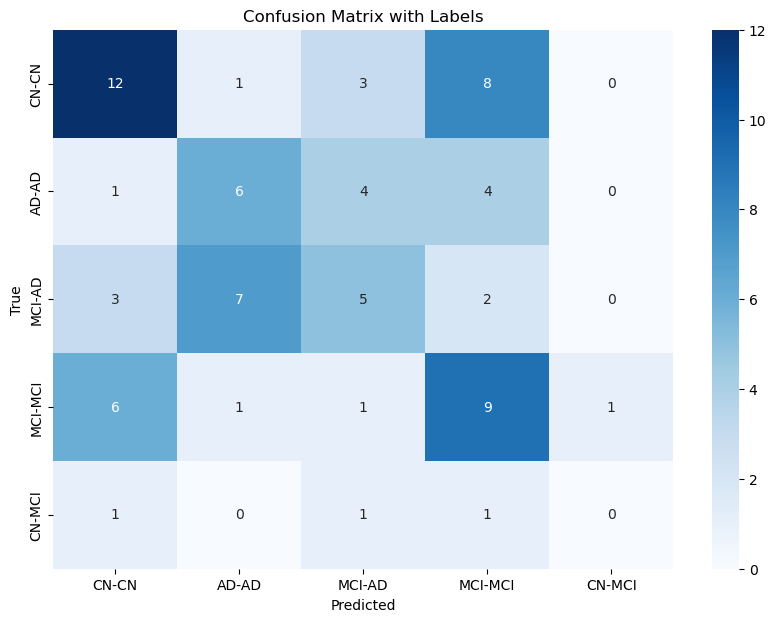

Cross Validation Score: [0.31271512 0.30699543 0.34946742 0.37740816 0.42182151]
Cross Validation Score Média: 0.3536815279550211
Cross Validation Score STD: 0.04261832248425133

--- Avaliando com threshold: 0.006 ---
              precision    recall  f1-score   support

           0       0.63      0.50      0.56        24
           1       0.58      0.47      0.52        15
           2       0.50      0.41      0.45        17
           3       0.35      0.61      0.45        18
           4       0.00      0.00      0.00         3

    accuracy                           0.48        77
   macro avg       0.41      0.40      0.40        77
weighted avg       0.50      0.48      0.48        77



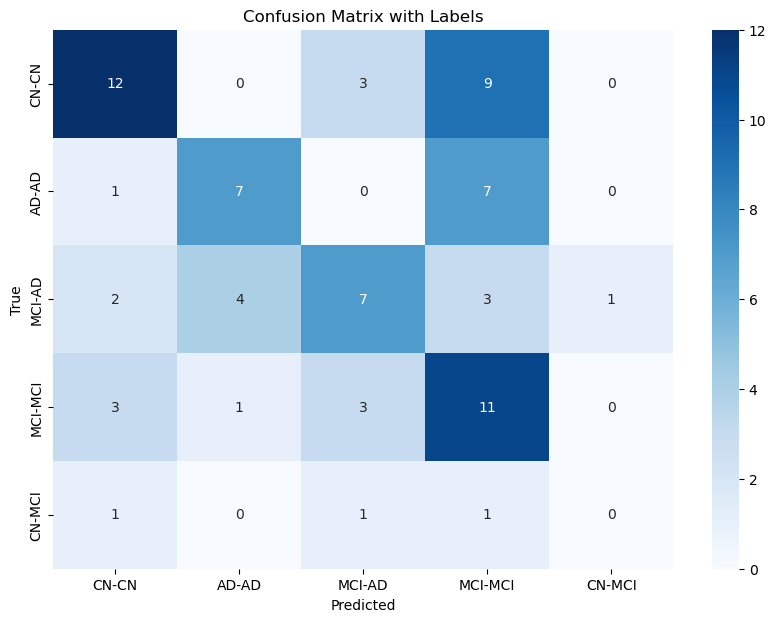

Cross Validation Score: [0.31271512 0.30699543 0.34946742 0.37740816 0.42182151]
Cross Validation Score Média: 0.3536815279550211
Cross Validation Score STD: 0.04261832248425133

--- Avaliando com threshold: 0.04 ---
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        24
           1       0.21      0.20      0.21        15
           2       0.11      0.12      0.11        17
           3       0.24      0.22      0.23        18
           4       0.00      0.00      0.00         3

    accuracy                           0.27        77
   macro avg       0.21      0.21      0.21        77
weighted avg       0.28      0.27      0.27        77



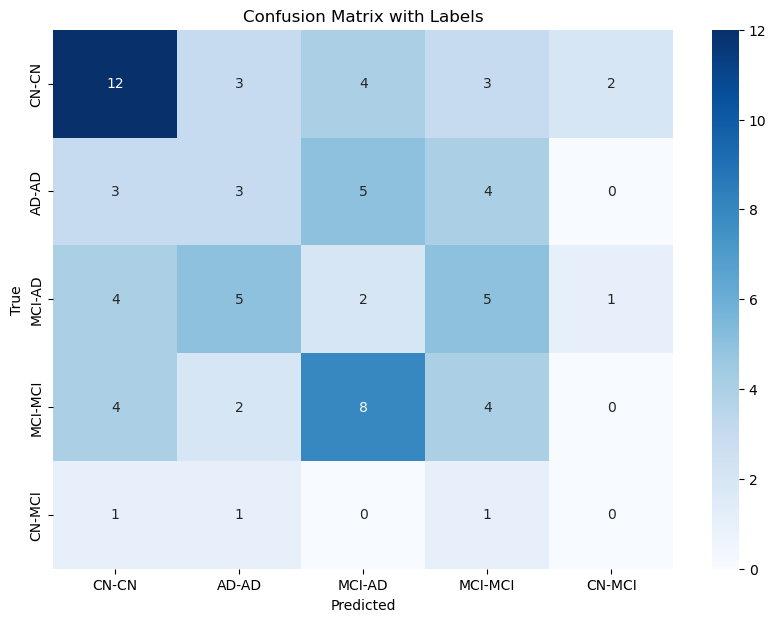

Cross Validation Score: [0.31271512 0.30699543 0.34946742 0.37740816 0.42182151]
Cross Validation Score Média: 0.3536815279550211
Cross Validation Score STD: 0.04261832248425133

--- Avaliando com threshold: 0.002 ---
              precision    recall  f1-score   support

           0       0.55      0.50      0.52        24
           1       0.58      0.47      0.52        15
           2       0.27      0.35      0.31        17
           3       0.25      0.28      0.26        18
           4       0.00      0.00      0.00         3

    accuracy                           0.39        77
   macro avg       0.33      0.32      0.32        77
weighted avg       0.40      0.39      0.39        77



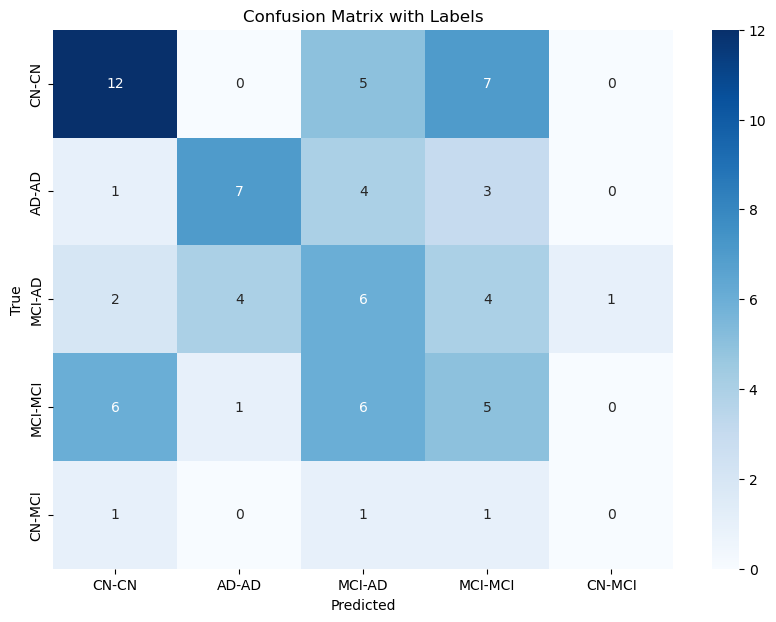

Cross Validation Score: [0.31271512 0.30699543 0.34946742 0.37740816 0.42182151]
Cross Validation Score Média: 0.3536815279550211
Cross Validation Score STD: 0.04261832248425133


In [13]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np


def evaluate_model_with_thresholds(model, X_train, X_test, y_train, y_test, thresholds, label_mapping,X,y):
    """
    Avalia o modelo RandomForestClassifier alterando o threshold para seleção de features.

    Parâmetros:
        model: O modelo RandomForestClassifier a ser utilizado.
        X_train: Conjunto de treinamento.
        X_test: Conjunto de teste.
        y_train: Labels do conjunto de treinamento.
        y_test: Labels do conjunto de teste.
        thresholds: Lista de thresholds para seleção de features.
        label_mapping: Mapeamento de rótulos para a matriz de confusão.
    """
    for threshold in thresholds:
        print(f"\n--- Avaliando com threshold: {threshold} ---")

        # Criar objeto SelectFromModel com o threshold atual
        sfm = SelectFromModel(model, threshold=threshold)

        # Selecionar as features mais importantes
        X_important_train = sfm.fit_transform(X_train, y_train)
        X_important_test = sfm.transform(X_test)

        # Treinar o modelo com as features selecionadas
        model.fit(X_important_train, y_train)
        
        # Fazer previsões
        y_pred = model.predict(X_important_test)

        # Imprimir relatório de classificação
        print(classification_report(y_test, y_pred, zero_division=0))

        # Calcular e plotar matriz de confusão
        cm = confusion_matrix(y_test, y_pred)
        plot_confusion_matrix_with_labels(cm, label_mapping)

        # Cross-validation no conjunto original
        rf_score_norm = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')

        # Exibir resultados de validação cruzada
        print(f"Cross Validation Score: {rf_score_norm}")
        print(f"Cross Validation Score Média: {rf_score_norm.mean()}")
        print(f"Cross Validation Score STD: {rf_score_norm.std()}")


# Exemplo de uso
gb_model_norm = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, random_state=34)
thresholds = [0.012, 0.010, 0.008, 0.006, 0.04, 0.002]

# Substitua pelas suas variáveis reais de X_train, X_test, y_train, y_test e label_mapping
evaluate_model_with_thresholds(gb_model_norm, X_train, X_test, y_train, y_test, thresholds, label_mapping,X_norm,y_norm)
